<a href="https://colab.research.google.com/github/rahiakela/building-computer-vision-applications-using-artificial-neural-networks/blob/master/3_techniques_of_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Techniques of Image Processing

In a computer vision application, images are normally ingested from their source, such as cameras, files stored on a computer disk, or streams from another application. In most cases, these input images are converted from one form into another. 

For example, we may need to resize, rotate, or change their colors. In some cases, we may need to remove the background pixels or merge two images. In other cases, we may need to find the boundaries around certain objects within an image.

Our learning objectives of this notebook are as follows:

- To explore most commonly used transformation techniques
- To learn arithmetic used in image processing
- To learn techniques of cleaning images, such as noise reduction
- To learn techniques of merging two or more images or splitting
channels
- To learn how to detect and draw contours (boundaries) around
objects within an image

## Setup

In [4]:
from __future__ import print_function
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

## Transformation

While working on any computer vision problem, you will often need to transform images into different forms.

### Resizing

Let’s start with our first transformation, resizing. To resize an image, we increase or decrease the height and width of the image. Aspect ratio is an important concept to remember when resizing an image. The aspect ratio is the proportion of width to height and is calculated by dividing width by height.

When resizing, maintaining the original aspect ratio ensures that the resized image does not look stretched or compressed.

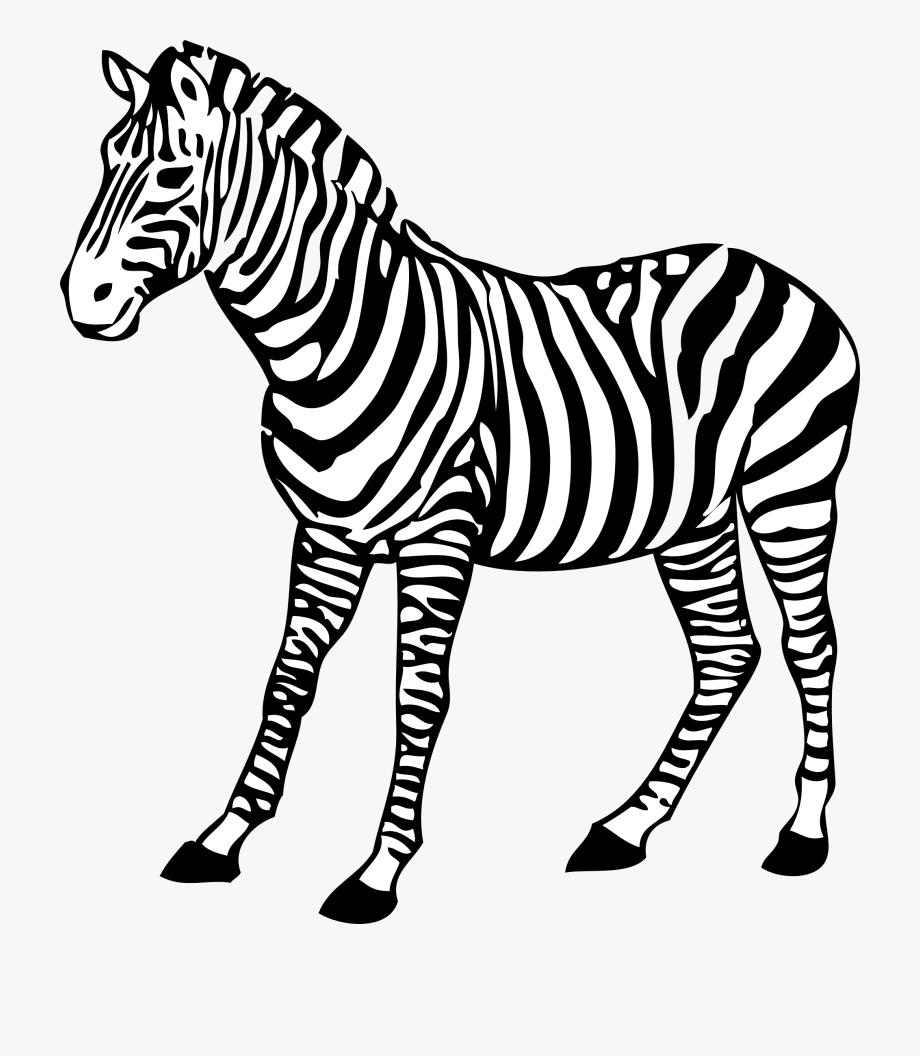

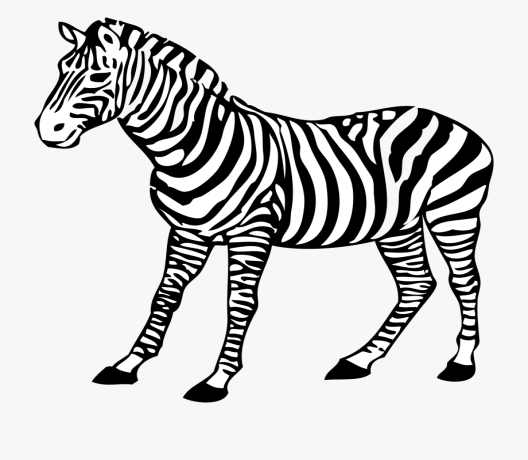

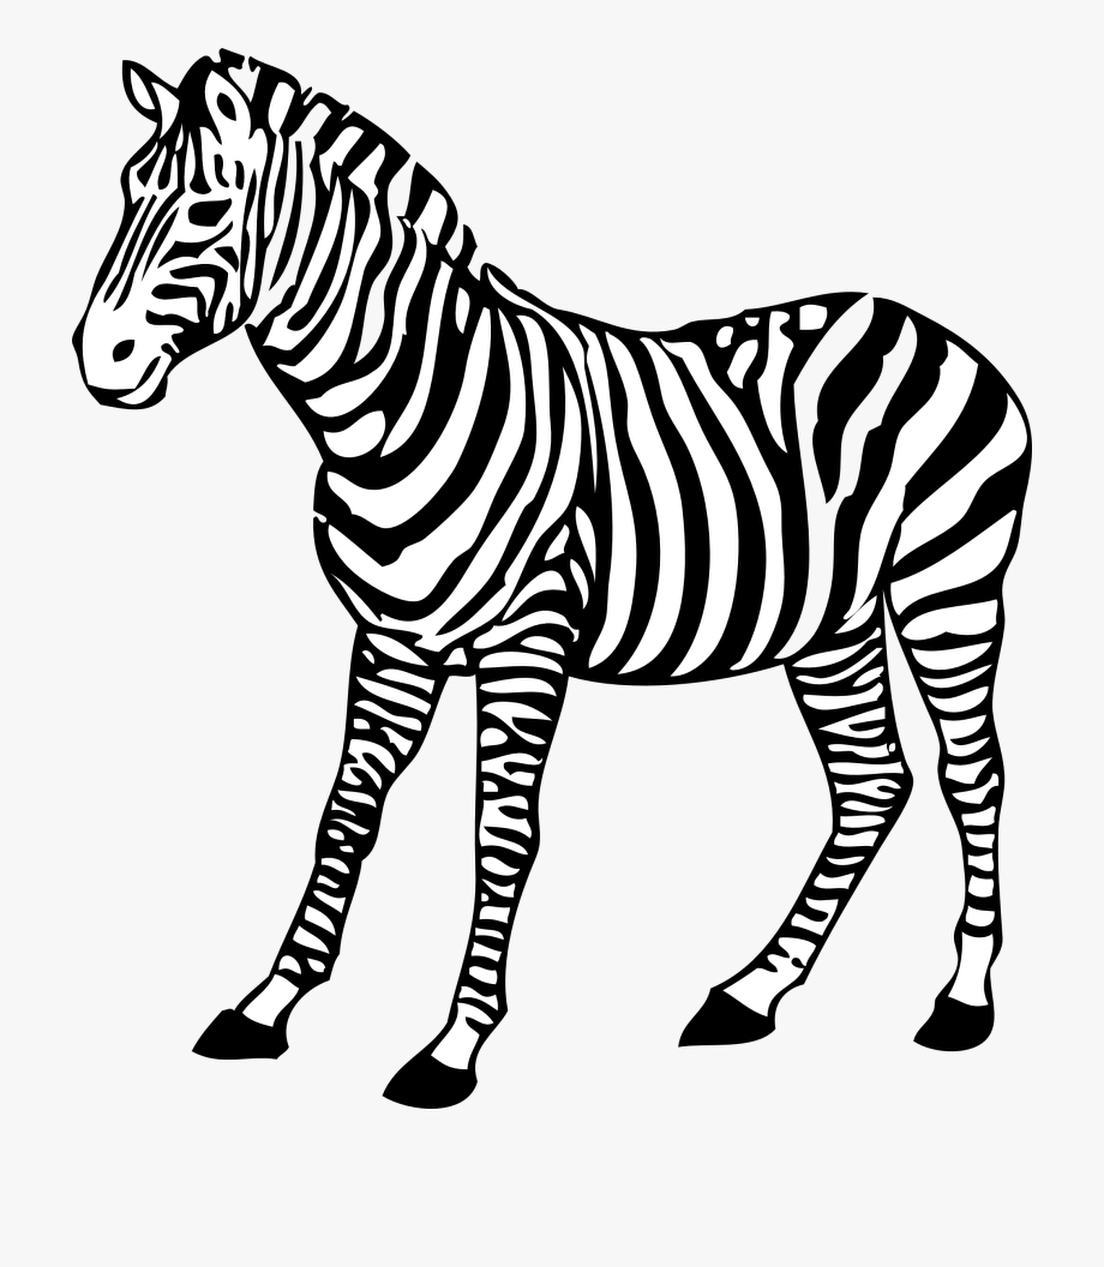

In [2]:
# image path
image_path = "zebra.png"
# Read or load image from its path
image = cv2.imread(image_path)

# Display the image
cv2_imshow(image)

# Get image shape which returns height, width, and channels as a tuple. Calculate the aspect ratio
(h, w) = image.shape[:2]
aspect = w / h

# lets resize the image to decrease height by half of the original image.
# Remember, pixel values must be integers.
height = int(0.5 * h)
width = int(height * aspect)

# New image dimension as a tuple
dimension = (height, width)
resized_image = cv2.resize(image, dimension, interpolation=cv2.INTER_AREA)

# Display the image
cv2_imshow(resized_image)

# Resize using x and y factors
resized_with_factors = cv2.resize(image, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LANCZOS4)
# Display the image
cv2_imshow(resized_with_factors)

### Translation

The image translation means moving the image either left, right, up, or down along the x- and y-axes.

There are two main steps when moving an image: 

- defining a translation matrix and calling the cv2.warpAffine function. 
- The translation matrix defines the direction and amount of movement. 

The warpAffine function is the OpenCV function that does the actual movement.

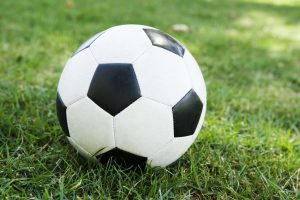

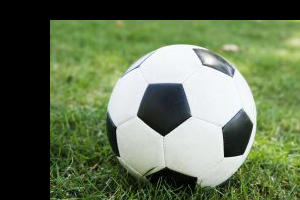

In [5]:
# image path
image_path = "soccer-in-green.jpg"
# Read or load image from its path
image = cv2.imread(image_path)

# Display the image
cv2_imshow(image)

# Define translation matrix
translation_matrix = np.float32([
  [1, 0, 50],
  [0, 1, 20]                               
])

# Move the image
moved_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

# Display the image
cv2_imshow(moved_image)

In this example, the translation matrix is a 2×3 matrix or a 2D array.

The first row, as defined by `[1,0,50]`, represents the movement along the x-axis by 50 pixels to the right. If the third element of this array is a negative number, the movement will be to the left.

The second row represented by `[0,1,20]` defines the movement along the y-axis by 20 pixels down. If the third element of this second row is a negative number, this will move the image up along the y-axis.

### Rotation

To rotate an image by some angle θ, we first define a rotation matrix by using OpenCV’s `cv2.getRotationMatrix2D`.

To rotate the image, we simply call the same cv2.warpAffine function like we did in the earlier case of translation .

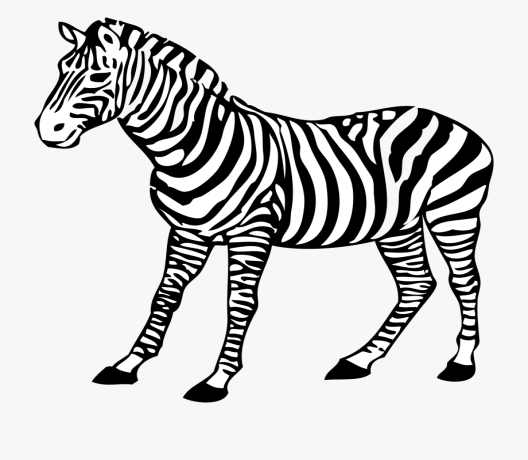

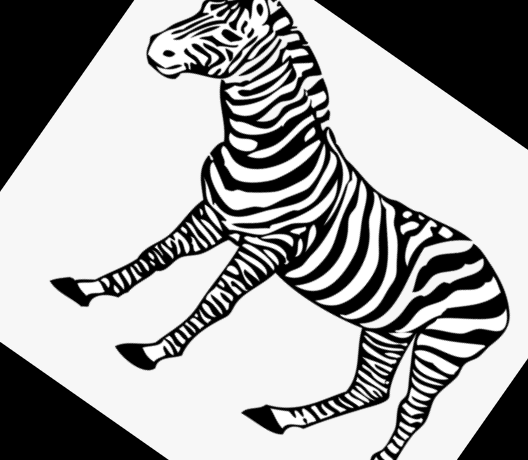

In [8]:
# image path
image_path = "zebrasmall.png"
# Read or load image from its path
image = cv2.imread(image_path)

# Display the image
cv2_imshow(image)

# hieght and width tuple
(h, w) = image.shape[:2]

# Define translation matrix
center = (h // 2, w // 2)
angle = -35
scale = 1.0
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# Rotate the image
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

# Display the image
cv2_imshow(rotated_image)

Notice that we divided the height and width by using // to get only the integer part of it.

A negative value will rotate the image clockwise, while the positive angle will rotate counter-clockwise.

The rotation scale, which is set to resize the image while rotating. A value of 1.0 keeps the original size after rotation. If we set this to 0.5, the rotated image will be reduced in size by half.

### Flipping

Flipping an image horizontally along the x-axis or vertically along the y-axis can be easily done by calling OpenCV’s convenient function `cv2.flip()`. 

This `cv2.flip()` function takes two arguments.
- The original image
- The direction of the flip
  - 0 means flip vertically.
  - 1 means flip horizontally.
  - -1 means first flip horizontally and then vertically.


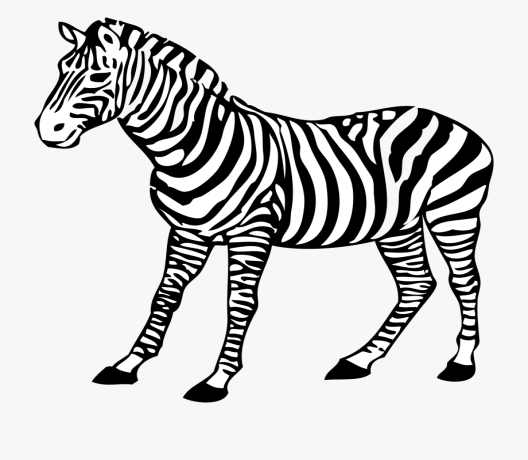

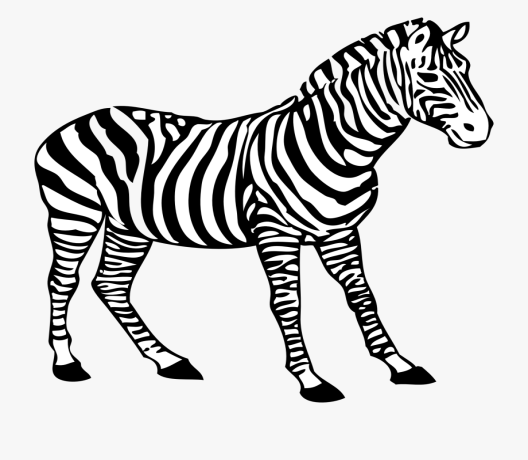

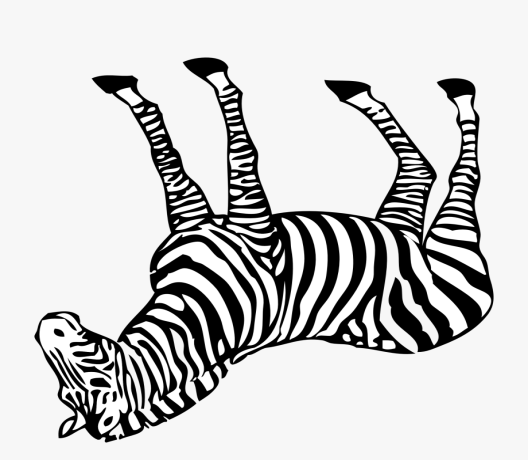

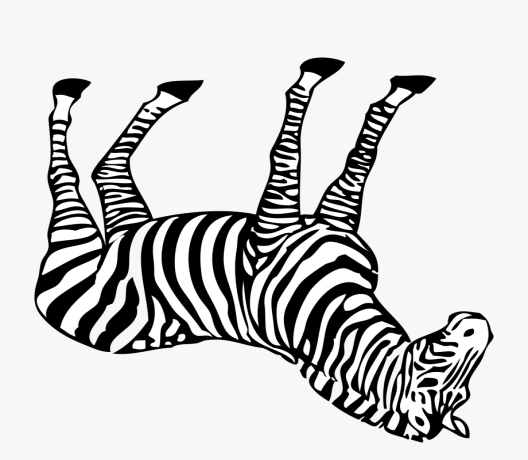

In [9]:
# image path
image_path = "zebrasmall.png"
# Read or load image from its path
image = cv2.imread(image_path)

# Display the image
cv2_imshow(image)

# Flip horizontally
flipped_horizontally = cv2.flip(image, 1)
cv2_imshow(flipped_horizontally)

# Flip vertically
flipped_vertically = cv2.flip(image, 0)
cv2_imshow(flipped_vertically)

# Flip horizontally and then vertically
flipped_hv = cv2.flip(image, -1)
cv2_imshow(flipped_hv)

### Cropping

Image cropping means removing the unwanted outer areas of an image.

Recall that OpenCV represents an image as a NumPy array. Cropping an image is achieved by slicing the image NumPy array. There is no special function in OpenCV to crop an image.

We use the NumPy array features to slice the image.

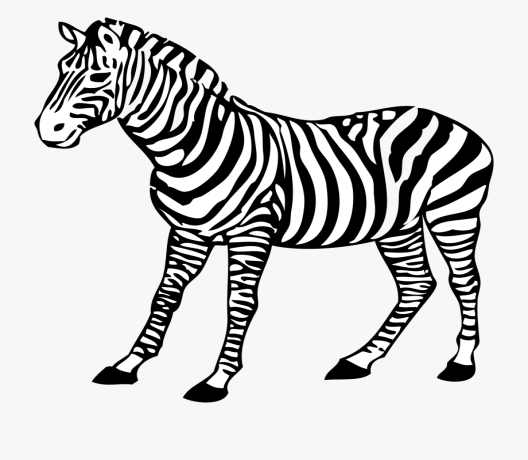

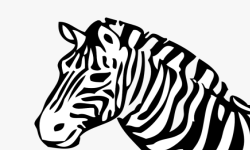

(460, 528, 3)


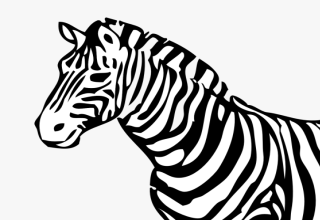

In [12]:
# image path
image_path = "zebrasmall.png"
# Read or load image from its path
image = cv2.imread(image_path)

# Display the image
cv2_imshow(image)

# Crop the image to get only the face of the zebra
cropped_image = image[0:150, 0:250]
cv2_imshow(cropped_image)

print(image.shape)

cropped_image = image[0:220, 0:320]
cv2_imshow(cropped_image)

## Image Arithmetic and Bitwise Operations